## Exploratory Data Analysis for Diabetes Data Set
(30 Points)
### **Dataset**
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

* Number of Instances 442

* Number of Attributes
First 10 columns are numeric predictive values

* Target
Column 11 is a quantitative measure of disease progression one year after baseline

* Attribute Information
 1. age age in years
 2. sex
 3. bmi body mass index
 4. bp average blood pressure
 5. s1 tc, T-Cells (a type of white blood cells)
 6. s2 ldl, low-density lipoproteins
 7. s3 hdl, high-density lipoproteins
 8. s4 tch, thyroid stimulating hormone
 9. s5 ltg, lamotrigine
 10. s6 glu, blood sugar level

### **Problem**
In your submssion, in addition to showing the statistics of the dataset, you will need to include the following:

1. the pair of attributes that show the strongest coorelation among all possible combinations.

2. for the two attributes found in part 1, pick one attribute as response and the other one as predictor, create a linear regression model for that pair of attributes and plot the bestfit line. 

3. for the linear regression obtained in part 2, if you switch the response and predictor variables and re-run the regression, do you have the same linear regression equation?

## Download and Process Dataset

Please don't change this section!

You can directly use the dataframe `df` in your code.

In [40]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes_data = load_diabetes()
print(diabetes_data["DESCR"])
df=pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## Exploratory Data Analysis

In [41]:
import seaborn as sns
sns.set()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


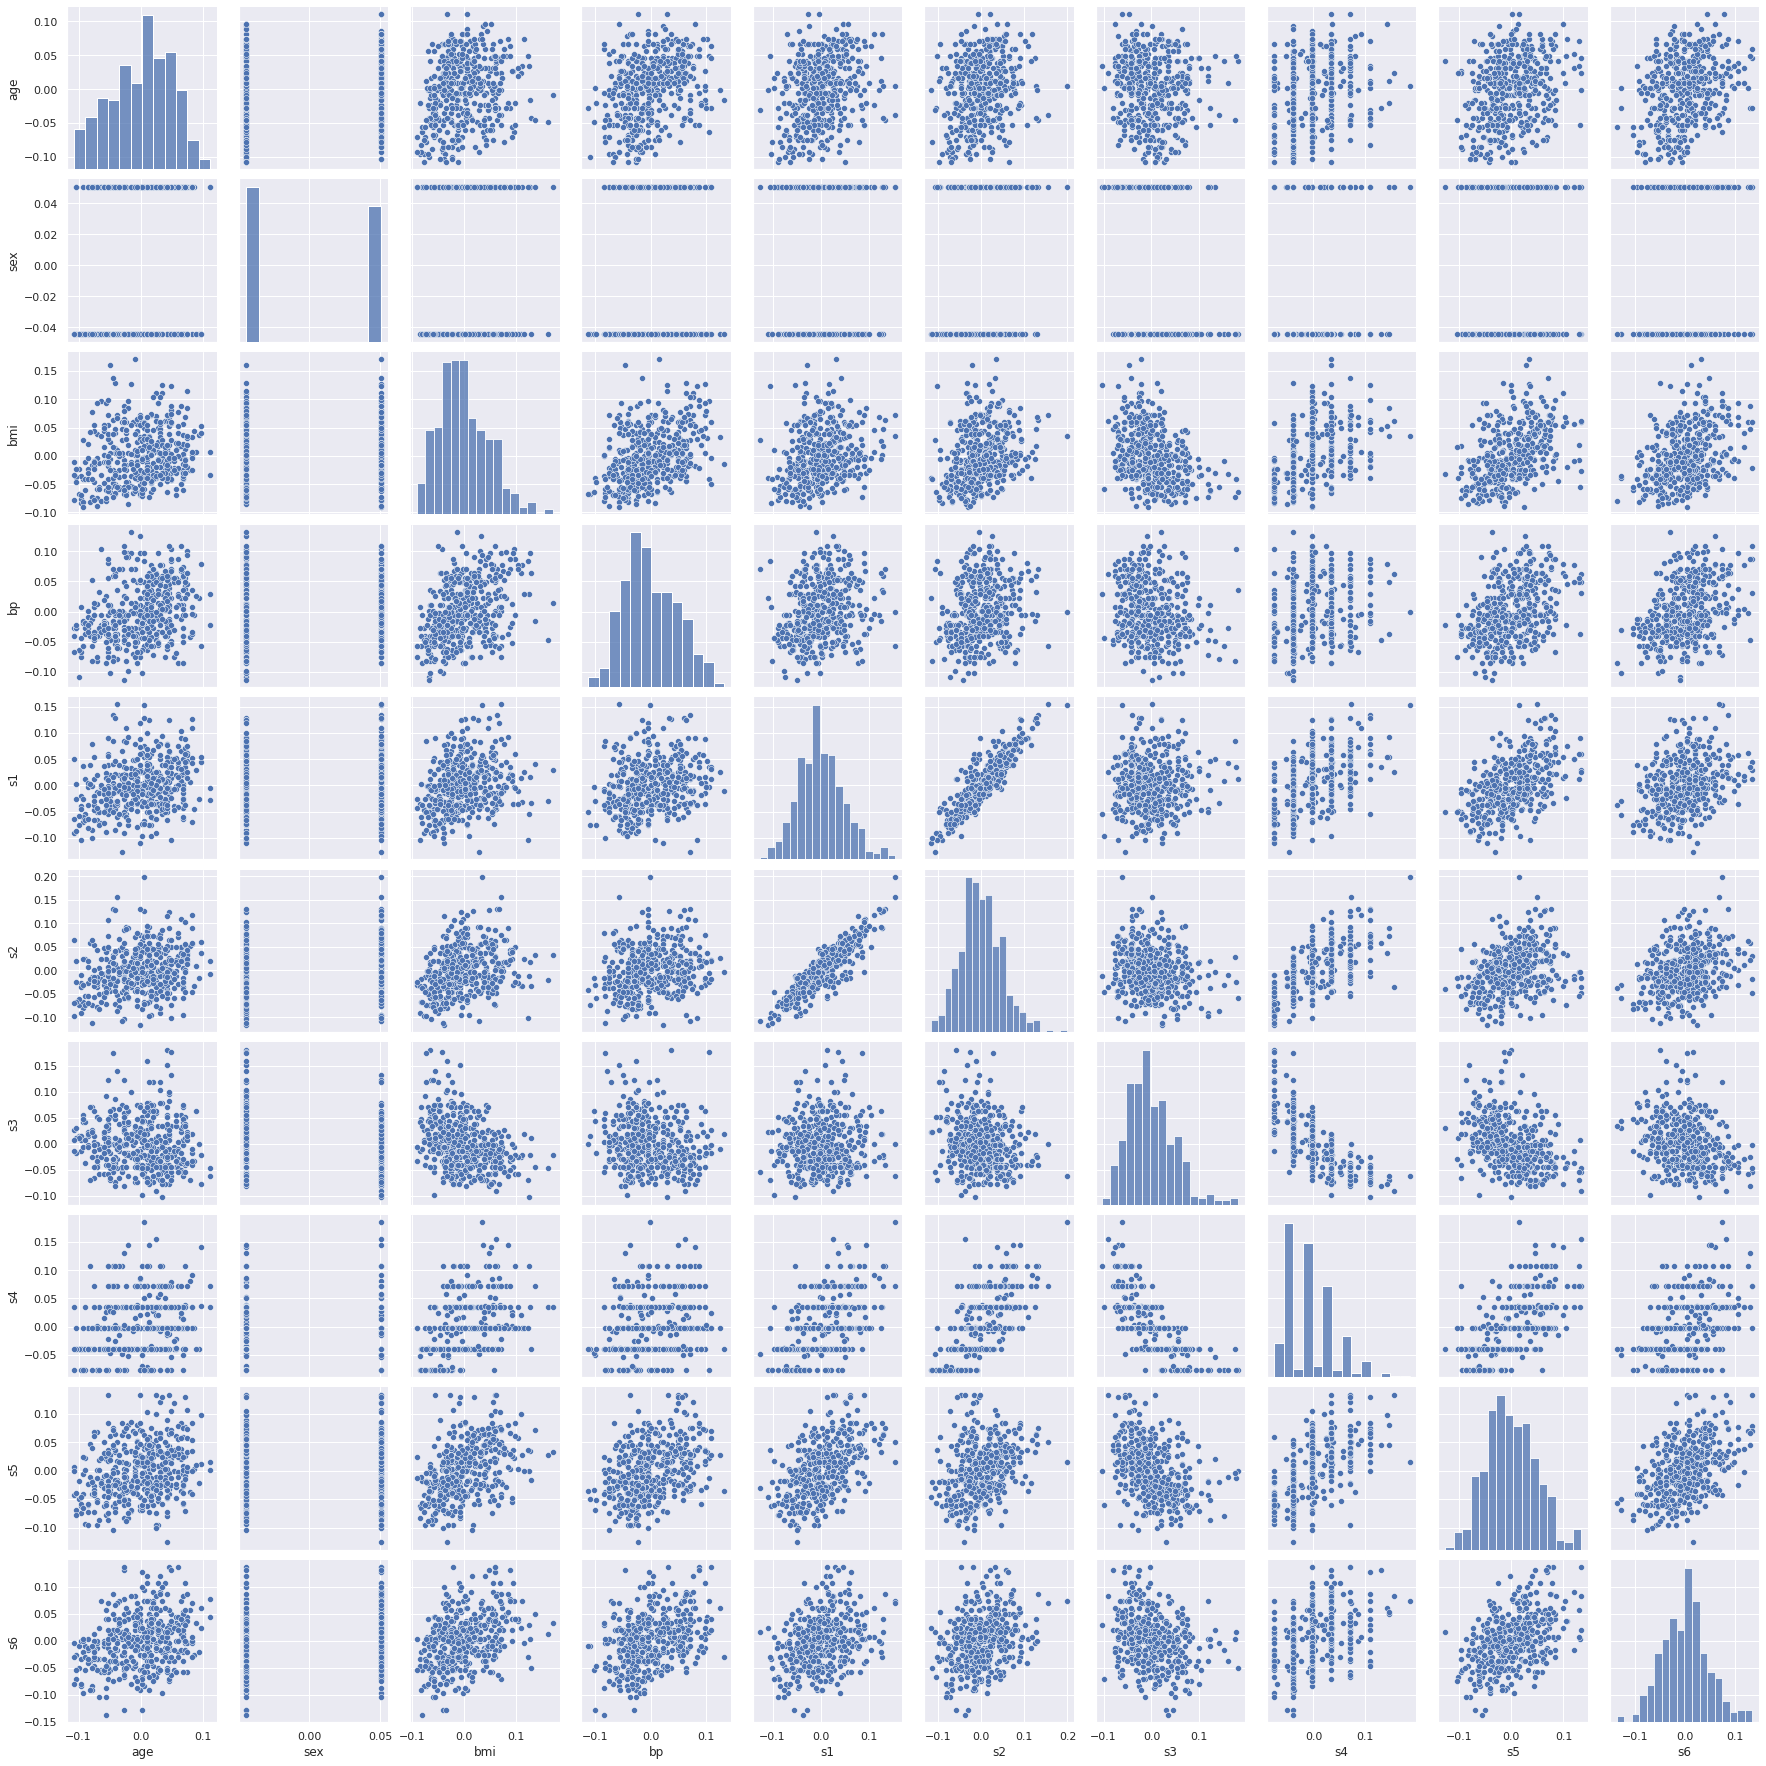

In [44]:
sns.pairplot(df[["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]])

In [45]:
#as seen above s1 and s2 have the strongest correlation

## Linear Regression Model

In [66]:
%matplotlib inline
from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x = df["s1"]
y = df["s2"]

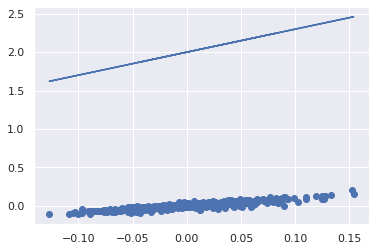

In [68]:
plt.scatter(x,y);
plt.plot(x, 3*x+2);

In [69]:
model = Sequential(Dense(units=1, input_shape=[1]))
model.compile (optimizer='sgd', loss='mean_squared_error')
model.fit(x,y,epochs=500, verbose=0);

In [70]:
yfit = model.predict(x)

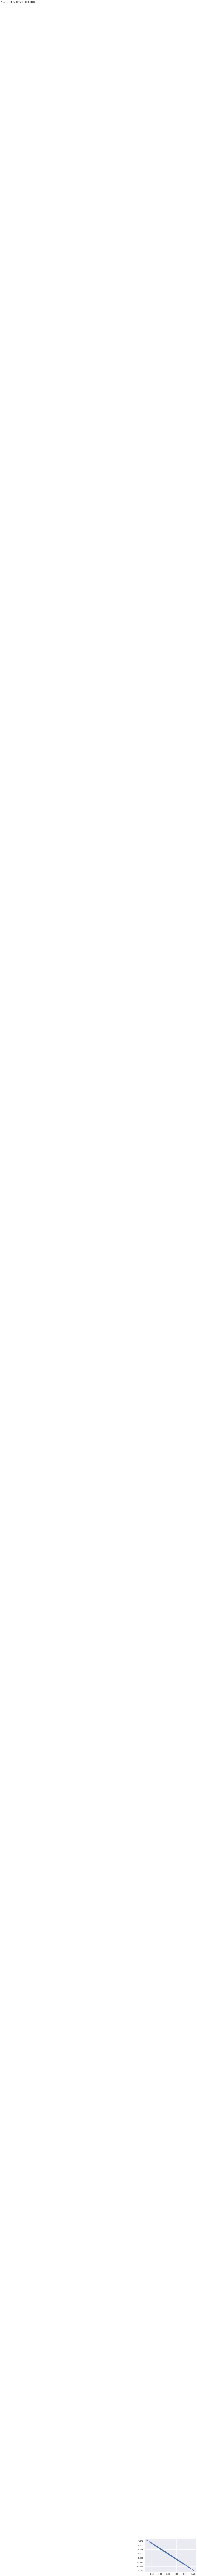

In [71]:
plt.scatter(x,yfit);
plt.plot(x, yfit);
plt.text(-1.0, 15, r"Y = %f *x + %f"%(tuple(model.get_weights())), fontsize=15);

In [63]:
x1 = df["s2"]
y1 = df["s1"]

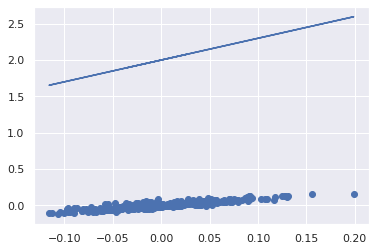

In [64]:
plt.scatter(x1,y1);
plt.plot(x1, 3*x1+2);

In [65]:
model = Sequential(Dense(units=1, input_shape=[1]))
model.compile (optimizer='sgd', loss='mean_squared_error')
model.fit(x1,y1,epochs=500, verbose=0);

In [55]:
yfit = model.predict(x1)

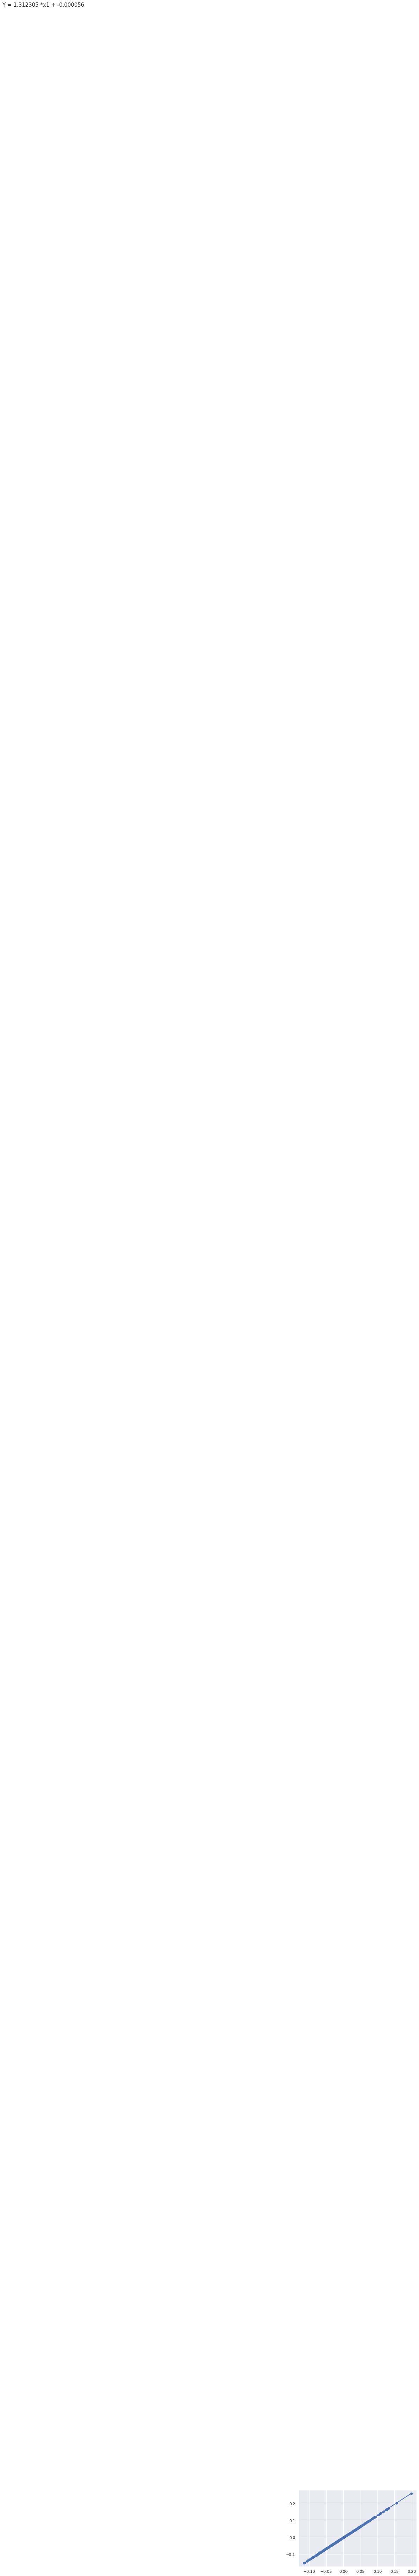

In [56]:
plt.scatter(x1,yfit);
plt.plot(x1, yfit);
plt.text(-1.0, 15, r"Y = %f *x1 + %f"%(tuple(model.get_weights())), fontsize=15);

In [57]:
# no the same linerar regression is not given 